# p-Hacking and Multiple Comparisons Bias
  
O viés de comparação múltipla é um problema recorrente em estatística, ciência de dados e previsões gerais. Em resumo, quanto mais testes você executar, maior a probabilidade de obter o resultado que deseja / espera. Se você ignorar a grande quantidade de testes que falharam, você está claramente  interpretando mal o que está contido em seus dados.

Um exemplo particularmente comum disso é quando procuramos por correlações em grandes conjuntos de dados que incluam muitas séries ou variáveis independentes. Nesse caso, você executará um teste toda vez que avaliar se existe um correlação entre conjuntos de variáveis.


## Estatística apenas ilumina esta questão

A maioria das pessoas também é vítima de viés de comparações múltiplas na vida real. Toda vez que você toma uma decisão, você está efetivamente tomando uma ação baseada em uma hipótese. Essa hipótese é frequentemente testada. Você pode acabar não fazendo muitos testes em sua vida diária.

Um exemplo pode ser decidir qual remédio está ajudando a curar um resfriado. Muitas pessoas tomam vários medicamentos ao mesmo tempo para tentar se livrar dos sintomas. Você pode pensar que um certo remédio funcionou, quando na realidade nenhum o fez e a gripe apenas começou a melhorar em algum momento.

O ponto aqui é que esse problema não se origina de testes estatísticos e valores p. Em vez disso, essas técnicas nos dão muito mais informações sobre o problema e quando ele pode estar ocorrendo.

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

## Correlação de Spearman

É um tipo de correlação que leva em conta as classificações dos dados. Isso pode ajudar com distribuições estranhas ou *outliers* que confundiriam outras medidas. O teste também retorna um valor p, que é a chave aqui.

Um coeficiênte alto aqui indica forte correlação.

In [2]:
X = pd.Series(np.random.normal(0, 1, 100))
Y = X

r_s = stats.spearmanr(Y, X)
print ('Spearman Rank: ', r_s[0])
print ('Valor p: ', r_s[1])

Spearman Rank:  0.9999999999999999
Valor p:  0.0


Se introduzirmos ruído, a correlação decairá.

In [3]:
X = pd.Series(np.random.normal(0, 1, 100))
Y = X + np.random.normal(0, 1, 100)

r_s = stats.spearmanr(Y, X)
print('Spearman Rank: ', r_s[0])
print('Valor p: ', r_s[1])

Spearman Rank:  0.658097809780978
Valor p:  1.0081023110539741e-13


### Valor p

Para mais informações sobre valores-p, consulte [teste de hipótese](./hypothesis.html). O que é importante lembrar é que eles são usados para testar uma hipótese, dado um conjunto de dados. Aqui estamos testando a hipótese de que existe uma relação entre duas séries, dados os valores da série.

#### IMPORTANTE: os valores p devem ser tratados como binários.

Um erro comum é que valores de p são tratados como mais ou menos significativos. Esta é uma prática ruim, pois permite o que é conhecido como [p-hacking](https://en.wikipedia.org/wiki/Data_dredging) e resultará em mais falsos positivos do que o esperado. Efetivamente, é muito provável que você se convença de que existem correlação em seus dados.

Para tratar valores de p como binários, um corte deve ser definido antecipadamente. Em seguida, o valor p deve ser comparado com o ponto de corte e tratado como significativo / não significativo. Aqui vamos mostrar isso.

### O ponto de corte é o nível de significância

Podemos nos referir ao ponto de corte como nosso nível de significância, porque um ponto de corte mais baixo significa que os resultados que o ultrapassam são significativos em um nível mais alto de confiança. Portanto, se você tiver um ponto de corte de 0,05, então, mesmo em dados aleatórios, 5% dos testes serão aprovados com base no acaso. Um corte de 0,01 reduz isso para 1%, o que é um teste mais rigoroso. Podemos, portanto, ter mais confiança em nossos resultados.

In [4]:
# Definir um ponto de corte de 5% significa que existe uma chance de 5%
# de nós obtendo um valor p significativo sem relação
# dentro de nossos dados (falso positivo).
# NOTA: Isto só é verdade se as suposições do teste tiverem sido
# satisfeito e o teste é, portanto, adequadamente calibrado.
# Cada teste têm diferente conjunto de suposições.

cutoff = 0.05

X = pd.Series(np.random.normal(0, 1, 100))
Y = X + np.random.normal(0, 1, 100)

r_s = stats.spearmanr(Y, X)
print('Spearman Rank: ', r_s[0])
if r_s[1] < cutoff:
    print('Existe evidencia significativa de correlação.')
else:
    print('Não existe evidencia significativa de correlação.')

Spearman Rank:  0.6667746774677467
Existe evidencia significativa de correlação.


## Experimento - Rodando multiplos testes

Começamos adquirindo dados.

In [5]:
df = pd.DataFrame()

N = 20
T = 100

for i in range(N):
    X = np.random.normal(0, 1, T)
    X = pd.Series(X)
    name = 'X%s' % i
    df[name] = X
    
df.head()

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19
0,-1.108196,0.993882,-1.655503,1.508412,0.893123,-2.736624,-0.172141,0.828342,1.010919,-0.122039,0.276130,1.119133,0.051488,0.361223,1.714541,-0.647072,-0.387621,1.362928,-0.263926,0.337215
1,0.234798,0.900473,1.105820,1.657591,-1.151174,0.552869,0.649583,0.378409,-0.673552,-0.785547,-0.676028,0.242650,-0.059738,0.780329,-1.956295,-0.367548,-0.625358,-0.816091,0.614298,0.189430
2,0.090563,-0.231213,-1.629547,1.714013,-0.164752,2.078106,0.766092,-0.727947,0.099148,0.225860,-0.250261,1.389186,0.549474,0.815422,-1.579816,0.072721,0.565414,-0.498103,-0.996747,1.133891
3,-1.793231,-0.684074,-0.833086,-1.195521,-1.100398,-0.748735,0.168787,0.845560,1.070759,0.931597,-0.345309,-0.547664,-0.513676,0.340118,-0.337583,-0.518988,0.832892,-0.357187,-0.778184,-0.127648
4,1.014514,-0.695624,0.365288,-0.929577,-0.921629,0.573487,-0.395006,-0.590703,0.203333,1.823049,0.901249,1.205343,-0.355468,-0.981964,0.379327,-0.320605,-0.597253,-1.990635,-0.314788,0.056184


Agora aplicamos testes em todos os pares possíveis em nossos dados procurando por casos onde o valor p é menor do que nosso ponto de corte definido de 5%.

In [6]:
cutoff = 0.05

significant_pairs = []

for i in range(N):
    for j in range(i+1, N):
        Xi = df.iloc[:, i]
        Xj = df.iloc[:, j]
        
        results = stats.spearmanr(Xi, Xj)
        
        pvalue = results[1]
        
        if pvalue < cutoff:
            significant_pairs.append((i, j))

Antes de verificarmos quantos resultados significativos obtivemos, vamos fazer algumas contas para verificar quantos esperar. A fórmula para o número de pares dados na série N é

$$\frac{N(N-1)}{2}$$

Não há relacionamentos em nossos dados, pois todos são gerados aleatoriamente. Se o nosso teste estiver calibrado corretamente, devemos esperar uma taxa de falsos positivos de 5%, dado o nosso corte de 5%. Portanto, devemos esperar o seguinte número de pares que alcançaram significância com base na chance aleatória pura.

In [7]:
(N * (N-1) / 2) * 0.05

9.5

Agora, comparemos com o número de positivos obtidos.

In [8]:
len(significant_pairs)

5

Não devemos esperar um número muito proximo do calculado aqui pois só rodamos um experimento. Se calcularmos esta correlação mais vezes, devemos notar convergência.

In [9]:
def do_experiment(N, T, cutoff=0.05):
    df = pd.DataFrame()

    # Make random data
    for i in range(N):
        X = np.random.normal(0, 1, T)
        X = pd.Series(X)
        name = 'X%s' % i
        df[name] = X

    significant_pairs = []

    # Look for relationships
    for i in range(N):
        for j in range(i+1, N):
            Xi = df.iloc[:, i]
            Xj = df.iloc[:, j]

            results = stats.spearmanr(Xi, Xj)

            pvalue = results[1]

            if pvalue < cutoff:
                significant_pairs.append((i, j))
    
    return significant_pairs


num_experiments = 100

results = np.zeros((num_experiments,))

for i in range(num_experiments):
    # Run a single experiment
    result = do_experiment(20, 100, cutoff=0.05)
    
    # Count how many pairs
    n = len(result)
    
    # Add to array
    results[i] = n

A média sobre varios experimentos deve se aproximar do valor esperado.

In [10]:
np.mean(results)

9.77

## Visualizando o que está acontecendo

O que está acontecendo aqui é que os valores p devem ser distribuídos uniformemente, caso não houver sinal nos dados. Basicamente, eles não carregam nenhuma informação e terão a mesma probabilidade de ser de 0,01 a 0,99. Como estes são amostrados aleatoriamente, você espera que uma determinada porcentagem de valores p esteja abaixo de qualquer limite que você escolher. Quanto menor o limite, menos serão aprovados no teste.

Vamos visualizar isso fazendo uma função modificada que retorna valores p.

In [11]:
def get_pvalues_from_experiment(N, T):
    df = pd.DataFrame()

    # Make random data
    for i in range(N):
        X = np.random.normal(0, 1, T)
        X = pd.Series(X)
        name = 'X%s' % i
        df[name] = X

    pvalues = []

    # Look for relationships
    for i in range(N):
        for j in range(i+1, N):
            Xi = df.iloc[:, i]
            Xj = df.iloc[:, j]

            results = stats.spearmanr(Xi, Xj)

            pvalue = results[1]

            pvalues.append(pvalue)
    
    return pvalues

Agora amostramos alguns valores p. Devemos amostrar numero suficiênte de valores para que a distribuição obtida seja estimada de maneira satisfatória, caso contrario obteremos dados muito ruidosos, como no exzemplo:

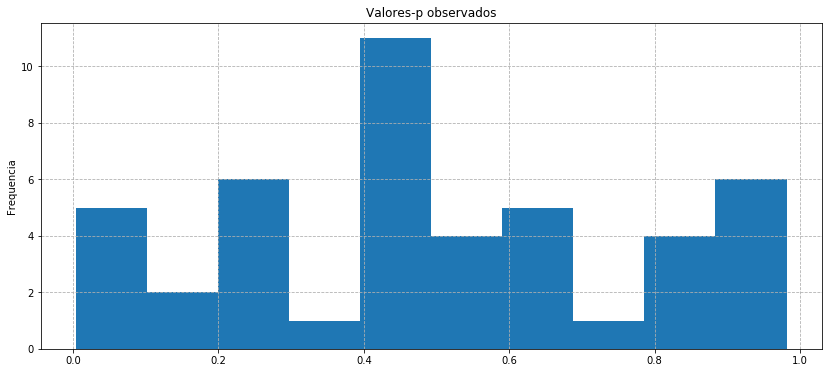

In [12]:
pvalues = get_pvalues_from_experiment(10, 100)
plt.figure(figsize=(14,6))
plt.grid(linestyle='--')
plt.hist(pvalues)
plt.ylabel('Frequencia')
plt.title('Valores-p observados');

Vamos aumentar o numero de amostrar `N` para obter uma estimativa mais precisa de nossa distribuição. Tenha em mente que os valores-p vão aumentar a uma taxa de

$$\frac{N (N-1)}{2}$$

ou de forma aproximadamente quadrática.

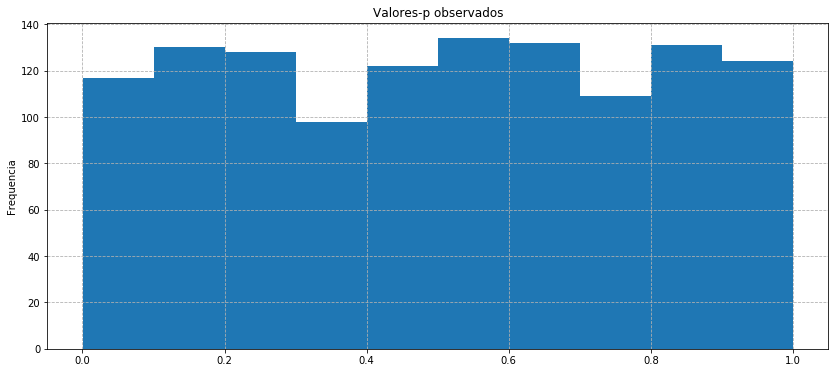

In [13]:
pvalues = get_pvalues_from_experiment(50, 100)
plt.figure(figsize=(14,6))
plt.grid(linestyle='--')
plt.hist(pvalues)
plt.ylabel('Frequencia')
plt.title('Valores-p observados');

A distribuição começa a aparentar uniforme, como esperado. Por último, vamos visualizar o processo de definição do ponto de corte:

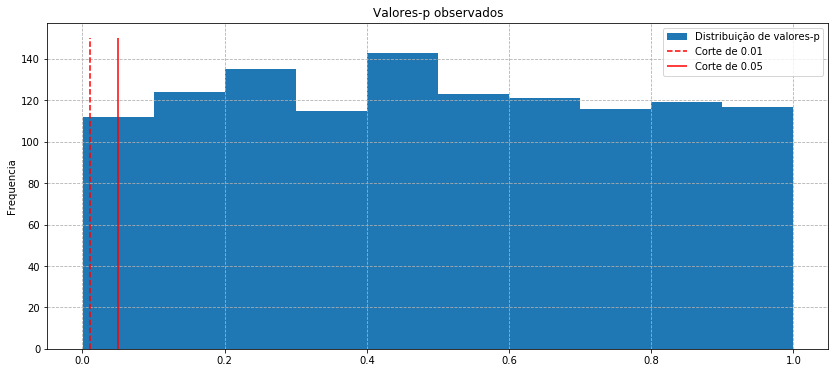

In [14]:
pvalues = get_pvalues_from_experiment(50, 100)
plt.figure(figsize=(14,6))
plt.grid(linestyle='--')
plt.vlines(0.01, 0, 150, colors='r', linestyle='--', label='Corte de 0.01')
plt.vlines(0.05, 0, 150, colors='r', label='Corte de 0.05')
plt.hist(pvalues, label='Distribuição de valores-p')
plt.legend()
plt.ylabel('Frequencia')
plt.title('Valores-p observados');

Podemos observar que com um valor de corte menor, devemos esperar menos ocorrências de falso positivo. Vamos conferir isso em nosso experimento prévio.

In [15]:
num_experiments = 100

results = np.zeros((num_experiments,))

for i in range(num_experiments):
    # Run a single experiment
    result = do_experiment(20, 100, cutoff=0.01)
    
    # Count how many pairs
    n = len(result)
    
    # Add to array
    results[i] = n

np.mean(results)

2.04

E finalmente, comparar com o o esperado:

In [16]:
(N * (N-1) / 2) * 0.01

1.9000000000000001

## Escolha entre sensibilidade / especificidade

Como em qualquer ajuste do valor-p de corte, temos uma [escolha](
https://en.wikipedia.org/wiki/Sensitivity_and_specificity). Um ponto de corte mais baixo diminui a taxa de falsos positivos, mas também diminui a chance de encontrarmos um relacionamento real (verdadeiro positivo). Então você não pode simplesmente diminuir seu corte para resolver este problema.

## Reduzindo o viés de comparações múltiplas

Não se pode eliminar realmente o viés de comparações múltiplas, porém podemos reduzir a chance de gerar resultados espúrios. Para fazer isso, temos duas opções.

### Opção 1: execute menos testes.

Esta é frequentemente a melhor opção. Ao invés de ficar esperando que acertar um sinal interessante por mágica, use seu conhecimento especializado para desenvolver uma hipótese e testá-la. Esse processo de explorar os dados, sugerindo uma hipótese, depois reunindo mais dados e testando a hipótese sobre os novos dados, é considerado o padrão-ouro na pesquisa estatística e científica. É crucial que o conjunto de dados no qual você desenvolve sua hipótese não seja aquele em que você a testa. Porque você encontrou o efeito enquanto explora, o teste provavelmente passará e não lhe dirá nada. O que você quer saber é quão consistente é o efeito. Mudar para novos dados e testes não só significará que você executa um teste novo, mas este pssará a se tratar de um estimador imparcial sobre se sua hipótese é verdadeira.

### Opção 2: Fatores de Ajuste e Correção Bon Ferroni

Se você precisar executar muitos testes, tente corrigir seus valores-p. Isso significa aplicar um fator de correção ao ponto de corte que você deseja obter, este será usado ao determinar se os valores p são significativos. O fator de correção mais conservador e comum é Bon Ferroni.

### Exemplo: correção de Bon Ferroni

O conceito por trás de Bon Ferroni é bastante simples. Este diz que, se rodarmos $ m $ tests, e tivermos um nível de significância / corte de $ a $, então devemos usar $ a / m $ como nosso novo ponto de corte ao determinar a significância. A matemática funciona devido ao seguinte.

Vamos dizer que rodemos $ m $ testes. Devemos esperar ver $ ma $ falsos positivos baseados no acaso. Se, ao invés disso, usarmos $ a / m $ como nosso ponto de corte, então devemos esperar que $ ma / m = a $ testes passam nosso ponto de corte. Portanto, estamos de volta à nossa taxa de falsos positivos de $ a $.

Vamos testar o constatado acima.

In [17]:
num_experiments = 100

results = np.zeros((num_experiments,))

N = 20

T = 100

desired_level = 0.05

num_tests = N * (N - 1) / 2

new_cutoff = desired_level / num_tests

for i in range(num_experiments):
    # Run a single experiment
    result = do_experiment(20, 100, cutoff=new_cutoff)
    
    # Count how many pairs
    n = len(result)
    
    # Add to array
    results[i] = n
    
np.mean(results)

0.07

Vemos que o número de testes positivos diminuiu bastante, o que é um bom sinal, já que os dados são aleatórios.

### Correção excessivamente conservadora

Como Bon Ferroni é tão rigoroso, muitas vezes você acaba passando por correlações reais sem detecta-las. Há um bom exemplo no artigo a seguir

https://en.wikipedia.org/wiki/Multiple_comparisons_problem

Efetivamente, pressupõe-se que todos os testes que são executados são independentes e não levam em conta nenhuma estrutura em seus dados. Você pode projetar um fator de correção mais adequado, mas isso adicionanará complexidade e, portanto, maior chance de falha em sua pesquisa.

Por causa do excesso de rigor de Bon Ferroni, muitas vezes executar menos testes é a melhor opção. Ou, se você precisar executar muitos testes, reserve vários conjuntos de dados para que seus dados relevantes possam passar por uma rodada de testes fora da amostra. Por exemplo, você pode utilizar o seguinte fluxo de trabalho:

 * Digamos que existem 100.000 correlações possíveis.
 * Faça um teste em cada correlação possível e escolha aquelas que passaram no teste.
 * Com esses candidatos, execute um teste em um novo conjunto de dados fora da amostra. Como você tem muitos candidatos a menos, agora é possível aplicar uma correção Bon Ferroni a esses valores-p ou, se necessário, repetir outra rodada de testes fora da amostra.

# O que é p-Hacking?

O p-hacking é apenas um abuso intencional ou acidental de viés de múltiplas comparações. É surpreendentemente comum, mesmo na literatura acadêmica. O excelente site de notícias estatísticas FiveThirtyEight tem uma ótima visualização:

https://fivethirtyeight.com/features/science-isnt-broken/

O artigo da Wikipedia também é informativo:

https://en.wikipedia.org/wiki/Data_dredging

Em geral, o conceito é simples. Ao executar muitos testes ou experimentos e depois focar apenas naqueles que funcionaram, você pode apresentar falsos positivos como resultados reais. Tenha em mente que isso também se aplica à execução de muitos modelos diferentes ou diferentes tipos de experimentos e em diferentes conjuntos de dados. Imagine que você passe um verão pesquisando um novo modelo para prever os preços futuros do milho. Você tenta 50 modelos diferentes até que finalmente um tenha sucesso. Isso é apenas sorte neste momento? Certamente você desejaria ser mais cuidadoso ao validar esse modelo e testá-lo fora de amostra em novos dados antes de acreditar em sua eficácia.